In [114]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [115]:
import cv2
from google.colab.patches import cv2_imshow
import os
import numpy as np

In [116]:
os.getcwd()
os.chdir('/content/drive/My Drive/Images/')

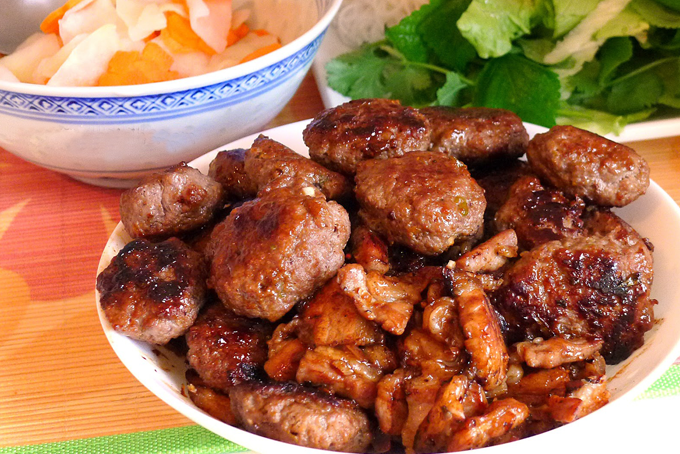

In [117]:
#Đọc ảnh
bun_cha = cv2.imread('bun_cha.png')

cv2_imshow(bun_cha)

In [118]:
#Chuyển ký tự sang binary
def str2bin(text):
  result = []
  for x in text:
    tmp = bin(ord(x)).replace('0b','')
    if len(tmp) < 7:
      tmp = '0' + tmp
    result.append(tmp)
  return result

#Cho thông điệp vào ảnh
def encrypt(img, txt, target):

  msg = ''.join(str2bin(txt))
  img_flat = img.flatten()

  key = []
  for i, bit in zip(range(target, target+len(msg)), msg):
    pixel = img_flat[i]
    pixel_bin = bin(pixel).replace('0b','')
    key.append(pixel)
    pixel_encoded = pixel_bin[:-1] + bit
    img_flat[i] = pixel_encoded

  result = img_flat.reshape(img.shape[0], img.shape[1], 3)

  return result, key, target

#Lấy thông điệp ra từ ảnh
def decrypt(img, key, target):
  string = ''
  img_flat = img.flatten()
  for i, original_pixel in zip(range(target, target+len(key)), key):
    pixel = img_flat[i]
    pixel_bin = bin(pixel).replace('0b','')
    string = string + pixel_bin[-1]
    img_flat[i] = original_pixel

  re = []
  for index in range(0, len(string), 7):
    re.append(string[index : index + 7])
  
  res = []
  for i in re:
    res.append(chr(int(i, 2)))
  
  result = ''.join(res)

  original_img = img_flat.reshape(img.shape[0], img.shape[1], 3)

  return result, original_img


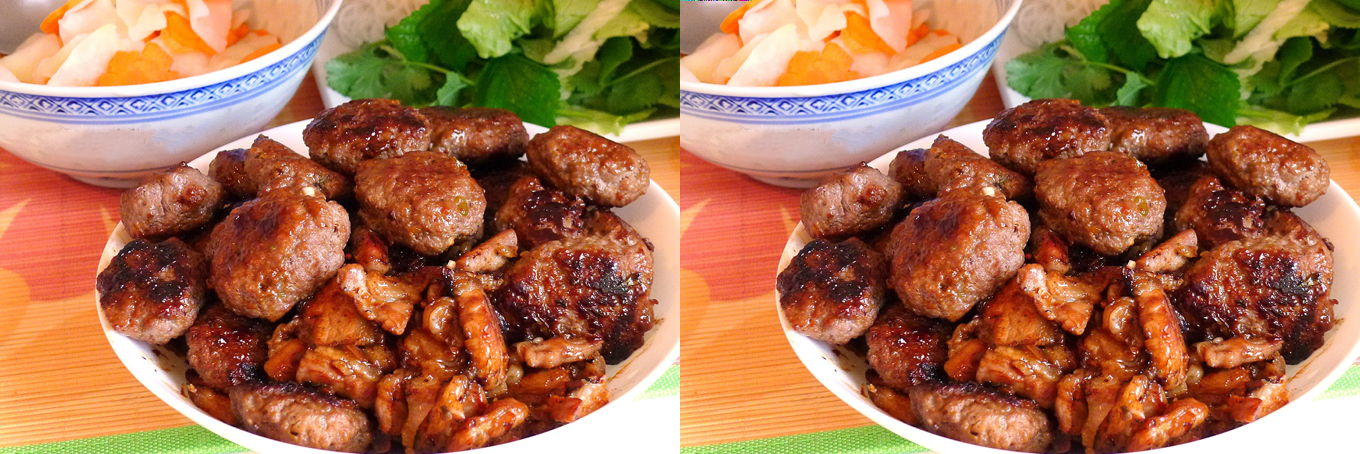

In [119]:
#Xác định thông điệp

secret_message = 'Kebab rice noodles is delicious'

#Chèn thông điệp vào ảnh
bun_cha_encrypt, key, target = encrypt(bun_cha, secret_message, 0)

out = np.hstack((bun_cha, bun_cha_encrypt))
cv2_imshow(out)

In [120]:
message, original = decrypt(bun_cha_encrypt, key, target)
print(message)

Kebab rice noodles is delicious


In [121]:
#So sánh ảnh ban đầu với ảnh encrypt
errorL2_1 = cv2.norm( bun_cha, bun_cha_encrypt, cv2.NORM_L2 )
similarity_1 = 1 - errorL2_1 / ( bun_cha.shape[0] * bun_cha.shape[1] )
print(similarity_1)

0.9950866640286308


In [122]:
#So sánh ảnh ban đầu với ảnh encrypt đã được decrypt
errorL2_2 = cv2.norm( bun_cha, original, cv2.NORM_L2 )
similarity_2 = 1 - errorL2_2 / ( bun_cha.shape[0] * bun_cha.shape[1] )
print(similarity_2)

1.0
